In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
client = MongoClient("localhost", 27017, maxPoolSize=50)
db = client.book
collection = db['FullTimeMatches']
cursor = collection.find()
df =  pd.DataFrame(list(cursor))
pd.set_option('display.max_rows', 5000)
pd.options.display.max_columns = None
df_Eredevisie =  df[df.league_name == 'Eredivisie'  ]


df_minimal_Eredevisie = df_Eredevisie[[  'startingatwithtime', 'hometeamname','awayteamname'
                                        ,'HomeTeamWhileHomeAverageAttackUpTo75'
                                        ,'HomeTeamWhileHomeAverageDefenceUpTo75'
                                        ,'HomeTeamWhileHomeAverageAttackLast15'
                                        ,'HomeTeamWhileHomeAverageDefenceLast15'
                                        ,'AwayTeamWhileAwayAverageAttackUpTo75'
                                        ,'AwayTeamWhileAwayAverageDefenceUpTo75'
                                        ,'AwayTeamWhileAwayAverageAttackLast15'
                                        ,'AwayTeamWhileAwayAverageDefenceLast15'
                                       ,'HomeTeamWhileHomeAverageAttack'
                                       ,'AwayTeamWhileAwayAverageAttack'
                                       ,'BucketedHomeTeamWhileHomeAverageAttack'
                                       ,'resultChangedAt60'
                                        ,'differenceAt75'
                                       ,'resultChangedAt75'
                                        ,'reddifferenceAt75'
                                       ,'awayGoals45To75'
                                        ,'homeGoals45To75'
                                       ,'resultChangedAt60'
                                        ,'goalScoredLast15'
                                      ]].copy()


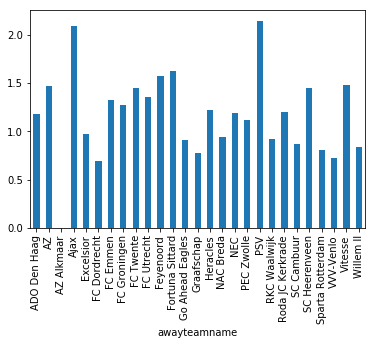

In [114]:
df_minimal_Eredevisie.groupby(['awayteamname'])['AwayTeamWhileAwayAverageAttack'].mean().plot(kind='bar')

data = df_minimal_Eredevisie

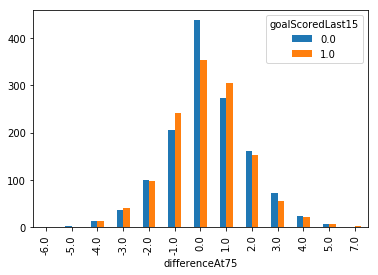

In [115]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.differenceAt75,data.goalScoredLast15).plot(kind='bar')


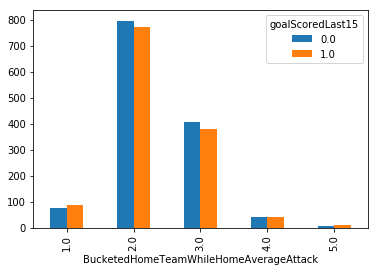

In [116]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.BucketedHomeTeamWhileHomeAverageAttack,data.goalScoredLast15).plot(kind='bar')



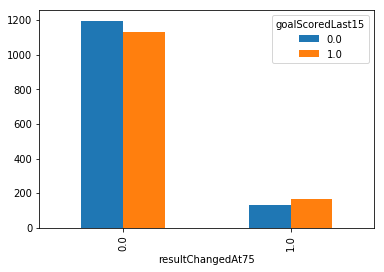

In [119]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.resultChangedAt75,data.goalScoredLast15).plot(kind='bar')


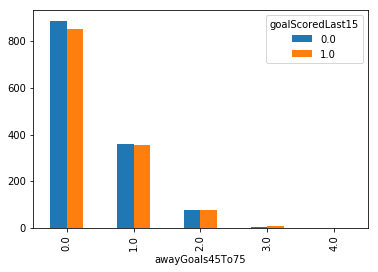

In [120]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.awayGoals45To75,data.goalScoredLast15).plot(kind='bar')


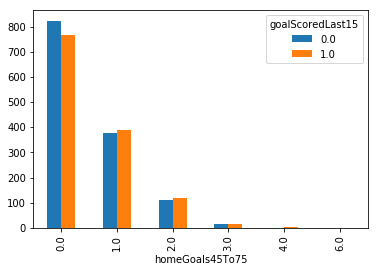

In [121]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.homeGoals45To75,data.goalScoredLast15).plot(kind='bar')


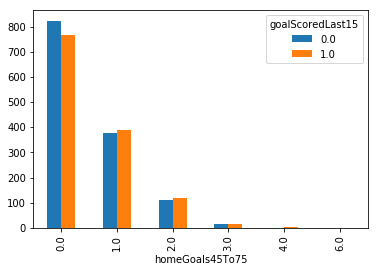

In [122]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.homeGoals45To75,data.goalScoredLast15).plot(kind='bar')

df_minimal_Eredevisie.startingatwithtime = pd.to_datetime(df_minimal_Eredevisie.startingatwithtime)
df_minimal_Eredevisie.set_index('startingatwithtime', inplace=True)


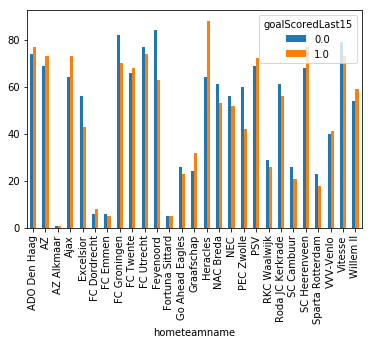

In [123]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.hometeamname,data.goalScoredLast15).plot(kind='bar')

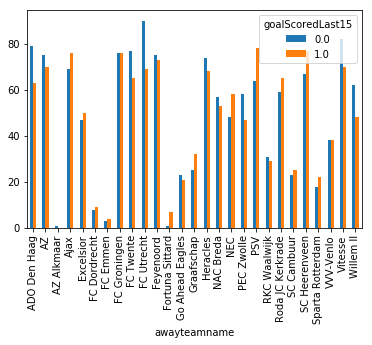

In [124]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.awayteamname,data.goalScoredLast15).plot(kind='bar')

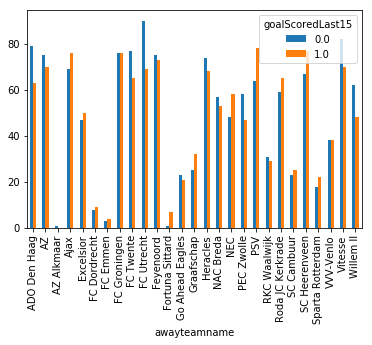

In [126]:
%matplotlib inline
data = df_minimal_Eredevisie
pd.crosstab(data.awayteamname,data.goalScoredLast15).plot(kind='bar')


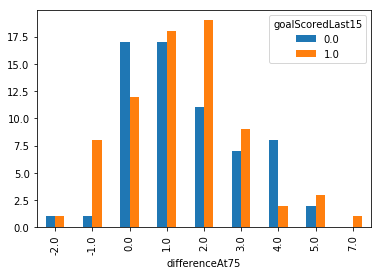

In [130]:
%matplotlib inline
data = df_minimal_Eredevisie[df_minimal_Eredevisie.hometeamname == 'Ajax'  ]


pd.crosstab(data.differenceAt75,data.goalScoredLast15).plot(kind='bar')

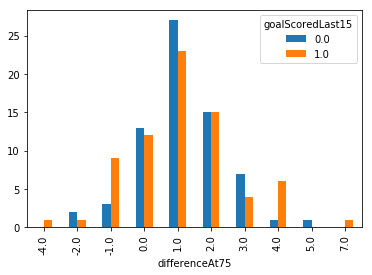

In [131]:
%matplotlib inline
data = df_minimal_Eredevisie[df_minimal_Eredevisie.hometeamname == 'PSV'  ]


pd.crosstab(data.differenceAt75,data.goalScoredLast15).plot(kind='bar')

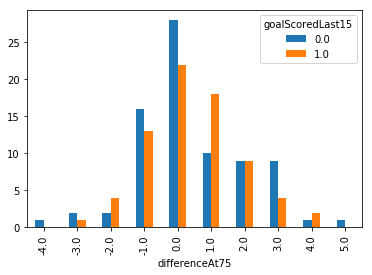

In [132]:
%matplotlib inline
data = df_minimal_Eredevisie[df_minimal_Eredevisie.hometeamname == 'Vitesse'  ]


pd.crosstab(data.differenceAt75,data.goalScoredLast15).plot(kind='bar')

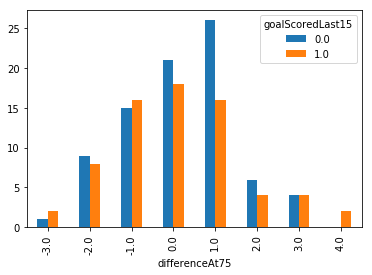

In [133]:
%matplotlib inline
data = df_minimal_Eredevisie[df_minimal_Eredevisie.awayteamname == 'Vitesse'  ]


pd.crosstab(data.differenceAt75,data.goalScoredLast15).plot(kind='bar')

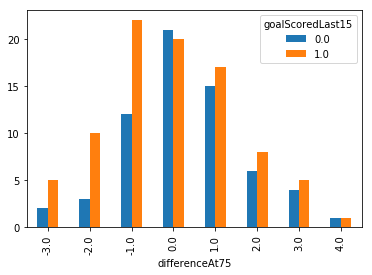

In [134]:
%matplotlib inline
data = df_minimal_Eredevisie[df_minimal_Eredevisie.hometeamname == 'Heracles'  ]


pd.crosstab(data.differenceAt75,data.goalScoredLast15).plot(kind='bar')

hometeamname
Ajax       AxesSubplot(0.125,0.2;0.775x0.68)
NEC        AxesSubplot(0.125,0.2;0.775x0.68)
PSV        AxesSubplot(0.125,0.2;0.775x0.68)
Vitesse    AxesSubplot(0.125,0.2;0.775x0.68)
Name: HomeTeamWhileHomeAverageAttack, dtype: object

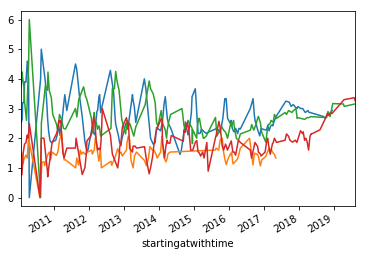

In [135]:
df_Eredevisie =  df[df.league_name == 'Eredivisie'  ]


df_minimal_Eredevisie = df_Eredevisie[[  'startingatwithtime', 'hometeamname','awayteamname'
                                        ,'HomeTeamWhileHomeAverageAttackUpTo75'
                                        ,'HomeTeamWhileHomeAverageDefenceUpTo75'
                                        ,'HomeTeamWhileHomeAverageAttackLast15'
                                        ,'HomeTeamWhileHomeAverageDefenceLast15'
                                        ,'AwayTeamWhileAwayAverageAttackUpTo75'
                                        ,'AwayTeamWhileAwayAverageDefenceUpTo75'
                                        ,'AwayTeamWhileAwayAverageAttackLast15'
                                        ,'AwayTeamWhileAwayAverageDefenceLast15'
                                       ,'HomeTeamWhileHomeAverageAttack'
                                       ,'AwayTeamWhileAwayAverageAttack'
                                        ,'differenceAt75'
                                        ,'reddifferenceAt75'
                                        ,'BucketedAwayTeamWhileAwayAverageAttack'
                                        ,'BucketedAwayTeamWhileAwayAverageDefence'
                                        ,'BucketedHomeTeamWhileHomeAverageAttack'
                                        ,'BucketedHomeTeamWhileHomeAverageDefence'
                                  
                                      ]].copy()


df_minimal_Eredevisie.startingatwithtime = pd.to_datetime(df_minimal_Eredevisie.startingatwithtime)
df_minimal_Eredevisie.set_index('startingatwithtime', inplace=True)

df_minimal_Eredevisie =  df_minimal_Eredevisie[(df_minimal_Eredevisie.hometeamname == 'Nac Breda') | (df_minimal_Eredevisie.hometeamname == 'NEC') | (df_minimal_Eredevisie.hometeamname == 'Ajax') | (df_minimal_Eredevisie.hometeamname == 'PSV') | (df_minimal_Eredevisie.hometeamname == 'Vitesse') ]

#df_minimal_Eredevisie =  df_minimal_Eredevisie[(df_minimal_Eredevisie.hometeamname == 'NEC') ]

df_minimal_Eredevisie.groupby('hometeamname')['HomeTeamWhileHomeAverageAttack'].plot()
